In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=1e-3, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.mse_ = []
        self.weights_ = []
        
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        w = np.zeros(X.shape[1])
        
        for it in tqdm(range(self.n_iter)):
            for i in range(X.shape[0]):
                 
                w[0] += 2. * self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    w[j] += 2. * self.eta * (y[i] - w.dot(X[i, :])) * X[i, j]
                self.weights_.append(w.copy())
                self.mse_.append(mean_squared_error(y, X.dot(w)))
                
        self.w_ = self.weights_[np.argmin(self.mse_)]
                
        return self
    
    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        return X.dot(self.w_)

In [3]:
data_demo = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/weights_heights.csv')

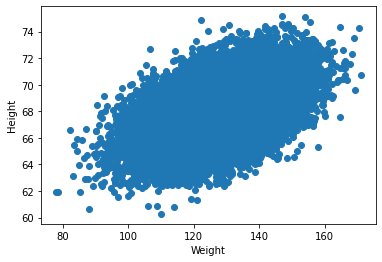

In [6]:
plt.scatter(data_demo.Weight, data_demo.Height);
plt.xlabel('Weight')
plt.ylabel('Height');

In [7]:
X, y = data_demo["Weight"].values, data_demo["Height"].values

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0], 1]))

In [10]:
sgdr = SGDRegressor()
sgdr.fit(X_train_scaled, y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.29s/it]


SGDRegressor()

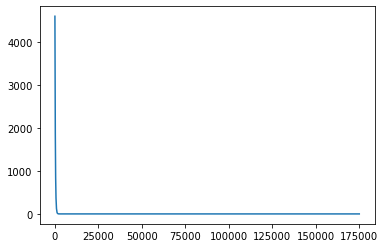

In [12]:
plt.plot(range(len(sgdr.mse_)), sgdr.mse_);

In [14]:
min(sgdr.mse_), sgdr.w_

(2.715134470158027, array([67.98947873,  0.94482721]))

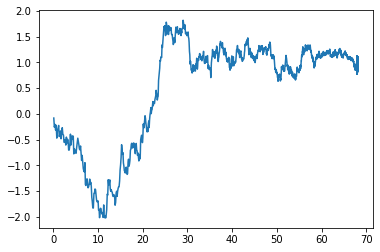

In [17]:
plt.plot([w[0] for w in sgdr.weights_],
         [w[1] for w in sgdr.weights_]);

In [18]:
mean_squared_error(y_valid, sgdr.predict(X_valid_scaled))

2.6708523420894084

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression().fit(X_train_scaled, y_train)

In [21]:
lm.coef_, lm.intercept_

(array([0.94537278]), 67.98930834742858)

In [24]:
mean_squared_error(y_valid, lm.predict(X_valid_scaled))

2.670830767667635